# Creating datasets

Creating datasets with PyTables via NumPy arrays is easy:

In [1]:
import numpy as np
import tables as tb

# Create a new file
f = tb.open_file("atest.h5", "w")

# Create a NumPy array
a = np.arange(100).reshape(20,5)

# Save the array
f.create_array(f.root, "array1", a)

/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [2]:
# Peek data
f.root.array1[:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

In [3]:
# Select some data areas (these, and only these are loaded into memory)
ta = f.root.array1
ta[1:10:3,2:5]

array([[ 7,  8,  9],
       [22, 23, 24],
       [37, 38, 39]])

In [4]:
# Make sure that the read data is the same than the original
np.allclose(ta[1:10:3,2:5], a[1:10:3,2:5])

True

In [5]:
# Create another array
ta2 = f.create_array(f.root, "array2", np.arange(10))

In [6]:
np.allclose(ta2, np.arange(10))

True

In [7]:
# Let's have a look at the size of the underlying file
!ls -l atest.h5

-rw-rw-r-- 1 faltet faltet 0 oct 14 11:39 atest.h5


In [8]:
# Flush data to the file (very important to keep all your data safe!)
f.flush()

In [9]:
# Now better?
!ls -l atest.h5

-rw-rw-r-- 1 faltet faltet 3024 oct 14 11:39 atest.h5


In [10]:
f.close()  # close access to file

In [11]:
# Reopen the file and revisit the datasets there
f = tb.open_file("atest.h5", mode="r")  # note the 'r'ead mode

In [12]:
# Get the summary of the contents
f

File(filename=atest.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [13]:
f.root.array1

/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [14]:
f.root.array1[:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54],
       [55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64],
       [65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74],
       [75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84],
       [85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94],
       [95, 96, 97, 98, 99]])

In [15]:
f.close()  # remember to always close your files when you are done!

# Playing with the object tree

In [16]:
# Re-open the existing file in 'a'ppend mode
f = tb.open_file("atest.h5", "a")

In [17]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [18]:
# Add a new group
f.create_group(f.root, 'group1', 'Title for group1')

/group1 (Group) 'Title for group1'
  children := []

In [19]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/group1 (Group) 'Title for group1'

In [20]:
f.move_node(f.root.array1, f.root.group1)

In [21]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [22]:
# Create a very nested group (note the `createparents` parameter)
f.create_group('/g1/g2/g3/g4', 'g5', createparents=True)

/g1/g2/g3/g4/g5 (Group) ''
  children := []

In [23]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1/g2 (Group) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''

In [24]:
# Add an array in the 'very nested' group
f.create_array(f.root.g1.g2.g3.g4.g5, 'array2', np.arange(10))

/g1/g2/g3/g4/g5/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [25]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1/g2 (Group) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''
/g1/g2/g3/g4/g5/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [26]:
# Removing nodes is very easy
f.remove_node(f.root.g1.g2.g3.g4.g5.array2)

In [27]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1/g2 (Group) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''

In [28]:
# Show the PyTables File object working as an iterator
for n in f: print(n)

/ (RootGroup) ''
/array2 (Array(10,)) ''
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/g1/g2 (Group) ''
/group1/array1 (Array(20, 5)) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''


In [29]:
# The `File.walk_nodes` method offer more flexibility
for n in f.walk_nodes(): print(n)

/ (RootGroup) ''
/array2 (Array(10,)) ''
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/g1/g2 (Group) ''
/group1/array1 (Array(20, 5)) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''


In [30]:
# Get info from a certain point of the hierarchy on
for n in f.walk_nodes(f.root.group1): print(n)

/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''


In [31]:
# walknodes allows to iterate over specific classes
for n in f.walk_nodes(f.root.group1, classname="Array"): print(n[:2])

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [32]:
f.close()

# HDF5 atributes

In [33]:
# Re-open the file
f = tb.open_file("atest.h5", "a")

In [34]:
f

File(filename=atest.h5, title='', mode='a', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/array2 (Array(10,)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1 (Group) ''
/group1 (Group) 'Title for group1'
/group1/array1 (Array(20, 5)) ''
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/g1/g2 (Group) ''
/g1/g2/g3 (Group) ''
/g1/g2/g3/g4 (Group) ''
/g1/g2/g3/g4/g5 (Group) ''

In [35]:
# Print the attrs in /array2
f.root.array2.attrs

/array2._v_attrs (AttributeSet), 4 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4']

In [36]:
# Add a new attribute to /array2
f.root.array2.attrs.myattr = "Hello World!"

In [37]:
f.root.array2.attrs

/array2._v_attrs (AttributeSet), 5 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myattr := 'Hello World!']

In [38]:
# Has the modification arrived to disk yet?
!ptdump -a atest.h5:/array2

/array2 (Array(10,)) ''
  /array2._v_attrs (AttributeSet), 4 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4']


In [39]:
# Nope, so force a flush
f.flush()

In [40]:
!ptdump -a atest.h5:/array2

/array2 (Array(10,)) ''
  /array2._v_attrs (AttributeSet), 5 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myattr := 'Hello World!']


In [41]:
# Attributes can also be general arrays
f.root.array2.attrs.myarray = np.arange(10)
f.flush()

In [42]:
!ptdump -a atest.h5:/array2

/array2 (Array(10,)) ''
  /array2._v_attrs (AttributeSet), 6 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myarray := array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
    myattr := 'Hello World!']


In [43]:
# Get a shortcut to the attribute handler
attrs = f.root.array2.attrs

In [44]:
attrs

/array2._v_attrs (AttributeSet), 6 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myarray := array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
    myattr := 'Hello World!']

In [45]:
# Removing an attribute
del attrs.myarray
attrs

/array2._v_attrs (AttributeSet), 5 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myattr := 'Hello World!']

In [46]:
# Adding another one with the same name than an existing one
attrs.myattr = 12.3
attrs

/array2._v_attrs (AttributeSet), 5 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4',
    myattr := 12.300000000000001]

In [47]:
# Print the attributes for all the arrays in the object tree
for n in f.walk_nodes(f.root.group1, classname="Array"): print(repr(n.attrs))

/group1/array1._v_attrs (AttributeSet), 4 attributes:
   [CLASS := 'ARRAY',
    FLAVOR := 'numpy',
    TITLE := '',
    VERSION := '2.4']


In [48]:
f.close()

# Chunked datasets

In [49]:
f = tb.open_file('ctest.h5', 'w')

In [50]:
# Create a CArray (Compressible Array)
f.create_carray(f.root, 'carray', tb.Float64Atom(), (10000,1000))

/carray (CArray(10000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16, 1000)

In [51]:
# Flush everything to disk
f.flush()

In [52]:
# The container is there, but not the data (yet)
!ls -lh ctest.h5

-rw-rw-r-- 1 faltet faltet 1,7K oct 14 11:39 ctest.h5


In [53]:
# Push some data into this carray container
ca = f.root.carray
na = np.linspace(0, 1, 1e7).reshape(10000,1000)
%time ca[:] = na

CPU times: user 20 ms, sys: 36 ms, total: 56 ms
Wall time: 53.4 ms


In [54]:
# Flush the carray container only
ca.flush()

In [55]:
!ls -lh ctest.h5

-rw-rw-r-- 1 faltet faltet 77M oct 14 11:39 ctest.h5


In [56]:
np.prod(ca.shape) * ca.dtype.itemsize / 2**20.

76.2939453125

In [57]:
# Retrieve only part of the data
ca[:100,::2]

array([[  0.00000000e+00,   2.00000020e-07,   4.00000040e-07, ...,
          9.94000099e-05,   9.96000100e-05,   9.98000100e-05],
       [  1.00000010e-04,   1.00200010e-04,   1.00400010e-04, ...,
          1.99400020e-04,   1.99600020e-04,   1.99800020e-04],
       [  2.00000020e-04,   2.00200020e-04,   2.00400020e-04, ...,
          2.99400030e-04,   2.99600030e-04,   2.99800030e-04],
       ..., 
       [  9.70000097e-03,   9.70020097e-03,   9.70040097e-03, ...,
          9.79940098e-03,   9.79960098e-03,   9.79980098e-03],
       [  9.80000098e-03,   9.80020098e-03,   9.80040098e-03, ...,
          9.89940099e-03,   9.89960099e-03,   9.89980099e-03],
       [  9.90000099e-03,   9.90020099e-03,   9.90040099e-03, ...,
          9.99940100e-03,   9.99960100e-03,   9.99980100e-03]])

In [58]:
f.close()

## Using compression (zlib)

In [59]:
f = tb.open_file('ctest-zlib.h5', 'w')

In [60]:
# Create a CArray (Compressible Array) using the zlib compressor
filters = tb.Filters(complib='zlib', complevel=1)
ca = f.create_carray(f.root, 'carray', tb.Float64Atom(), (10000,1000),
                     filters=filters)

In [61]:
# Push some data on this carray container
na = np.linspace(0, 1, 1e7).reshape(10000,1000)
%time ca[:] = na

CPU times: user 328 ms, sys: 8 ms, total: 336 ms
Wall time: 336 ms


In [62]:
# Flush the carray container only
ca.flush()
!ls -lh ctest-zlib.h5

-rw-rw-r-- 1 faltet faltet 6,8M oct 14 11:39 ctest-zlib.h5


In [63]:
np.prod(ca.shape) * ca.dtype.itemsize / 2**20.

76.2939453125

In [64]:
f.close()

## Using compression (Blosc)

In [65]:
f = tb.open_file('ctest-blosc.h5', 'w')

In [66]:
# Create a CArray (Compressible Array) using the Blosc compressor
filters = tb.Filters(complib='blosc:lz4', complevel=9)
ca = f.create_carray(f.root, 'carray', tb.Float64Atom(), (10000,1000),
                     filters=filters)

In [67]:
# Push some data on this carray container
na = np.linspace(0, 1, 1e7).reshape(10000,1000)
%time ca[:] = na

CPU times: user 68 ms, sys: 8 ms, total: 76 ms
Wall time: 73.5 ms


In [68]:
# Flush the carray container only
ca.flush()
!ls -lh ctest-blosc.h5

-rw-rw-r-- 1 faltet faltet 7,7M oct 14 11:39 ctest-blosc.h5


In [69]:
np.prod(ca.shape) * ca.dtype.itemsize / 2**20.

76.2939453125

In [70]:
f.close()

# Queries in Table objects

In [71]:
# The description for the tabular data
class TabularData(tb.IsDescription):
    col1 = tb.StringCol(200)
    col2 = tb.IntCol()
    col3 = tb.FloatCol()

In [72]:
# Open a file and create the Table container
f = tb.open_file('atable.h5', 'w')
t = f.create_table(f.root, 'table', TabularData, 'table title',
                   filters=tb.Filters(9, 'blosc'))

In [73]:
t

/table (Table(0,), shuffle, blosc(9)) 'table title'
  description := {
  "col1": StringCol(itemsize=200, shape=(), dflt=b'', pos=0),
  "col2": Int32Col(shape=(), dflt=0, pos=1),
  "col3": Float64Col(shape=(), dflt=0.0, pos=2)}
  byteorder := 'little'
  chunkshape := (309,)

In [74]:
%%time
#  Fill the table with some 1 million rows
r = t.row
for i in range(1000*1000):
    r['col1'] = str(i)
    r['col2'] = i + 1
    r['col3'] = i * (i + 1)
    r.append()
t.flush()

CPU times: user 1.54 s, sys: 8 ms, total: 1.54 s
Wall time: 1.54 s


In [75]:
t

/table (Table(1000000,), shuffle, blosc(9)) 'table title'
  description := {
  "col1": StringCol(itemsize=200, shape=(), dflt=b'', pos=0),
  "col2": Int32Col(shape=(), dflt=0, pos=1),
  "col3": Float64Col(shape=(), dflt=0.0, pos=2)}
  byteorder := 'little'
  chunkshape := (309,)

In [76]:
# Size on disk
!ls -lh atable.h5

-rw-rw-r-- 1 faltet faltet 4,9M oct 14 11:39 atable.h5


In [77]:
# Real size
np.prod(t.shape) * t.dtype.itemsize / 2**20.

202.178955078125

In [78]:
# Do a query (regular)
%time [r['col1'] for r in t if r['col2'] < 5]

CPU times: user 232 ms, sys: 8 ms, total: 240 ms
Wall time: 236 ms


[b'0', b'1', b'2', b'3']

In [79]:
# Repeat the query, but using in-kernel method
%time [r['col1'] for r in t.where('col2 < 5')]

CPU times: user 176 ms, sys: 8 ms, total: 184 ms
Wall time: 174 ms


[b'0', b'1', b'2', b'3']

In [80]:
# Performing complex conditions (regular query)
%time [r['col1'] for r in t if r['col2'] < 5 and r['col3'] < 10]

CPU times: user 228 ms, sys: 0 ns, total: 228 ms
Wall time: 229 ms


[b'0', b'1', b'2']

In [81]:
# Complex, in-kernel queries
%time [r['col1'] for r in t.where('(col2 < 5) & (col3 < 10)')]

CPU times: user 144 ms, sys: 8 ms, total: 152 ms
Wall time: 141 ms


[b'0', b'1', b'2']

In [82]:
# Get a structured array out of disk
sa = t[:]
sa

array([(b'0', 1, 0.0), (b'1', 2, 2.0), (b'2', 3, 6.0), ...,
       (b'999997', 999998, 999995000006.0),
       (b'999998', 999999, 999997000002.0),
       (b'999999', 1000000, 999999000000.0)], 
      dtype=[('col1', 'S200'), ('col2', '<i4'), ('col3', '<f8')])

In [83]:
# Perform the query in-memory using pure NumPy machinery 
%time sa[((sa['col2'] < 5) & (sa['col3'] < 10))]['col1']

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 21.9 ms


array([b'0', b'1', b'2'], 
      dtype='|S200')

In [84]:
# Create an index for the on-disk table
%time t.cols.col2.create_csindex()

CPU times: user 420 ms, sys: 24 ms, total: 444 ms
Wall time: 446 ms


1000000

In [85]:
# Repeat the complex query (indexed)
%time [r['col1'] for r in t.where('(col2 < 5) & (col3 < 10)')]

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 5.1 ms


[b'0', b'1', b'2']

Indexing normally offers the best speed for doing queries.

In [86]:
f.close()

# Out of Core computations

In [87]:
# Open file for performing out of core computation
f = tb.open_file('poly.h5', 'w')

In [88]:
%%time
# Fill values for the x values
x = f.create_earray(f.root, 'x', tb.Float64Atom(), (0,), filters=tb.Filters(9, 'blosc'))
for s in range(10):
    x.append(np.linspace(s, s+1, 1e6))
x.flush()  # dump data to disk

CPU times: user 180 ms, sys: 8 ms, total: 188 ms
Wall time: 185 ms


In [89]:
# Create the expression to compute
expr = tb.Expr("0.25*x**3 + 0.75*x**2 + 1.5*x - 2")

In [90]:
# Create the output vector y
y = f.create_carray(f.root, 'y', tb.Float64Atom(), (len(x),),
                    filters=tb.Filters(5, 'blosc'))

In [91]:
# Specify that the ouput of the expression has to go to y on disk
expr.set_output(y)

In [92]:
# Evaluate!
%time expr.eval()

CPU times: user 292 ms, sys: 24 ms, total: 316 ms
Wall time: 254 ms


/y (CArray(10000000,), shuffle, blosc(5)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16384,)

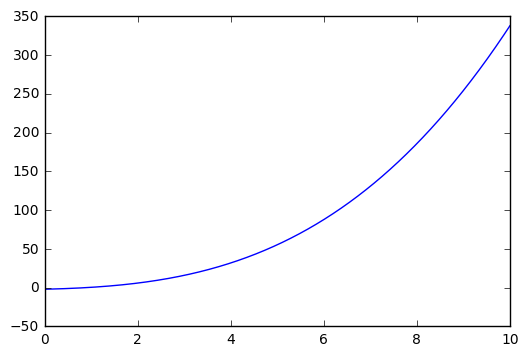

In [93]:
# Do a plot of the computed polynomial
%matplotlib inline
import matplotlib.pyplot as plt
xn = f.root.x[:]
yn = f.root.y[:]
plt.plot(xn, yn)

In [94]:
f.flush()
!ls -lh poly.h5

-rw-rw-r-- 1 faltet faltet 59M oct 14 11:39 poly.h5


In [95]:
!ptdump -v poly.h5

/ (RootGroup) ''
/x (EArray(10000000,), shuffle, blosc(9)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)
/y (CArray(10000000,), shuffle, blosc(5)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (16384,)


In [96]:
# Compare with the time for doing this in-memory with NumPy
%time yn2 = 0.25*xn**3 + 0.75*xn**2 + 1.5*xn - 2

CPU times: user 692 ms, sys: 44 ms, total: 736 ms
Wall time: 736 ms


In [97]:
# All the values are the same?
np.allclose(yn, yn2)

True

In [98]:
f.close()

# Exercise

Provided the next code for doing a downsampling of an image in-memory:

In [99]:
import numba

@numba.autojit
def mymean(x):
    xs, ys = x.shape
    factor = 1. * xs * ys   # notice the 1. for forcing a float!
    s = 0.
    for i in range(xs):
        for j in range(ys):
            s += x[i,j] / factor
    return s

@numba.autojit
def downsample_numba2(x, cell):
    c0, c1 = cell
    yshape = (x.shape[0] // c0, x.shape[1] // c1)
    y = np.empty(yshape, x.dtype)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i, j] = mymean(x[i*c0:(i+1)*c0,j*c1:(j+1)*c1])
    return y

Adapt it to create a new function that takes an HDF5 bi-dimensional dataset (that can be considered as an image) and create another HDF5 dataset with the result of the downsampled image.  Use the '/BLR/mau' in the [HDF5 sample file](../data/ic_dst_NEXT_v0_08_02_Kr_ACTIVE_0_0_5bar_MCRD_10000.root.h5).

** Note: ** You should try to avoid loading the complete image in-memory.  Do that only chunk-by-chunk (or, in this case, cell-by-cell).

** Hint: ** As output use a CArray object (because you know the resulting dimensions beforehand).  See the documentation for the [CArray constructor](http://pytables.github.io/usersguide/libref/homogenous_storage.html#the-carray-class).

** Bonus: ** Try to optimize the conversion time by computing a downsampled row at a time and storing it in one shot.